In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df1=pd.read_csv('/content/drive/MyDrive/diabetes.csv')
df1.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [4]:
df1.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [5]:
df1['Age'].min() #Given

21

In [6]:
df1[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction']]=df1[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction']].replace(0,np.nan)

In [7]:
(df1<0).any()

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

In [8]:
df1.isna().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

<Axes: >

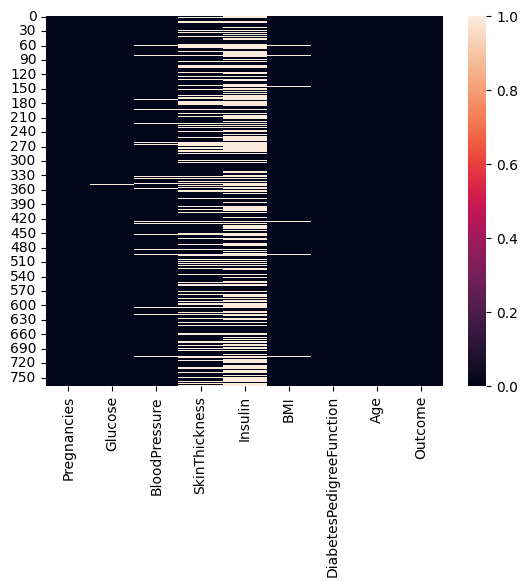

In [9]:
sns.heatmap(df1.isnull())

In [10]:
min_glucose=df1['Glucose'].min()
df1['Glucose']=df1['Glucose'].replace(np.nan, min_glucose )

In [11]:
min_bloodpressure=df1['BloodPressure'].min()
df1['BloodPressure']=df1['BloodPressure'].replace(np.nan, min_bloodpressure)

In [12]:
min_BMI=df1['BMI'].min()
df1['BMI']=df1['BMI'].replace(np.nan, min_BMI)

In [13]:
df1.mean()

Pregnancies                   3.845052
Glucose                     121.180990
BloodPressure                70.199219
SkinThickness                29.153420
Insulin                     155.548223
BMI                          32.253255
DiabetesPedigreeFunction      0.471876
Age                          33.240885
Outcome                       0.348958
dtype: float64

In [14]:
df1.isnull().sum()


Pregnancies                   0
Glucose                       0
BloodPressure                 0
SkinThickness               227
Insulin                     374
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [15]:
df1.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [16]:
from sklearn.impute import KNNImputer
# KNNImputer gives better accuracy compared to IterativeImputer(RandomForestRegressor)
# Create the KNNImputer object
imputer = KNNImputer(n_neighbors=5)  # Replace 5 with the desired number of neighbors

df1[['SkinThickness','BMI','Glucose', 'BloodPressure','Insulin']]=imputer.fit_transform(df1[['SkinThickness','BMI','Glucose', 'BloodPressure','Insulin']])
df1.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,209.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,73.0,26.6,0.351,31,0
2,8,183.0,64.0,29.4,383.2,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [17]:
# from sklearn.experimental import enable_iterative_imputer
# from sklearn.impute import IterativeImputer
# from sklearn.ensemble import RandomForestRegressor

# imputer = IterativeImputer(estimator=RandomForestRegressor(),random_state=10)

# df1[['SkinThickness','BMI','Glucose', 'BloodPressure','Insulin']]=imputer.fit_transform(df1[['SkinThickness','BMI','Glucose', 'BloodPressure','Insulin']])
# df1.isna().sum()

In [18]:
df1.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,209.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,73.0,26.6,0.351,31,0
2,8,183.0,64.0,29.4,383.2,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
5,5,116.0,74.0,18.2,95.4,25.6,0.201,30,0
6,3,78.0,50.0,32.0,88.0,31.0,0.248,26,1
7,10,115.0,24.0,29.2,98.0,35.3,0.134,29,0
8,2,197.0,70.0,45.0,543.0,30.5,0.158,53,1
9,8,125.0,96.0,25.0,151.6,18.2,0.232,54,1


In [19]:
df1=df1.drop('Pregnancies', axis=1) #Domain knowledge suggests that "Pregnancies" might not be directly related to diabetes


In [20]:
df1=df1.drop('Age', axis=1)

In [21]:
df1.head(10)

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Outcome
0,148.0,72.0,35.0,209.0,33.6,0.627,1
1,85.0,66.0,29.0,73.0,26.6,0.351,0
2,183.0,64.0,29.4,383.2,23.3,0.672,1
3,89.0,66.0,23.0,94.0,28.1,0.167,0
4,137.0,40.0,35.0,168.0,43.1,2.288,1
5,116.0,74.0,18.2,95.4,25.6,0.201,0
6,78.0,50.0,32.0,88.0,31.0,0.248,1
7,115.0,24.0,29.2,98.0,35.3,0.134,0
8,197.0,70.0,45.0,543.0,30.5,0.158,1
9,125.0,96.0,25.0,151.6,18.2,0.232,1


<Axes: >

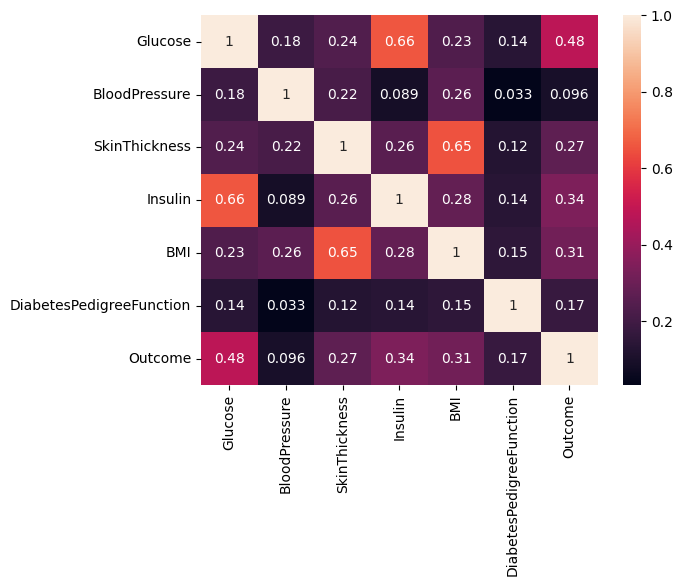

In [22]:
correlation_matrix=df1.corr()
sns.heatmap(correlation_matrix, annot=True)

<Axes: xlabel='Outcome', ylabel='count'>

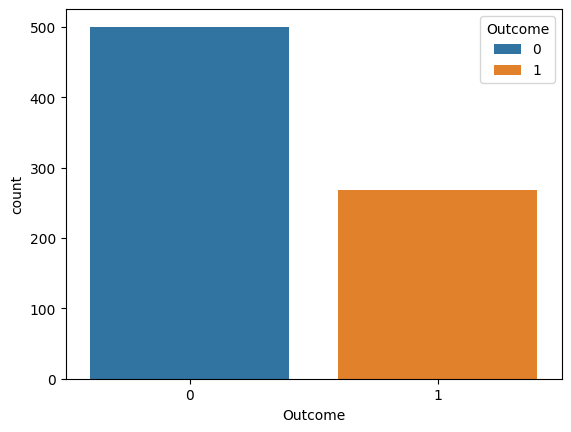

In [23]:
sns.countplot(x='Outcome',hue='Outcome',data=df1)

In [24]:
data_length = len(df1)
having_diabetic = (len(df1[df1.Outcome==1])/data_length)*100
print(f'Population in our sample who is diabetic : {round(having_diabetic,2)}%')
non_diabetic = (len(df1[df1.Outcome==0])/data_length)*100
print(f'Population in our sample who is non-diabetic : {round(non_diabetic,2)}%')

Population in our sample who is diabetic : 34.9%
Population in our sample who is non-diabetic : 65.1%


<Axes: xlabel='SkinThickness', ylabel='Count'>

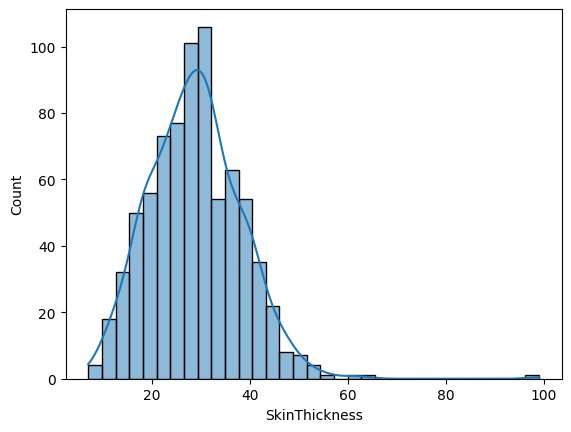

In [25]:
sns.histplot(data=df1, x='SkinThickness', kde=True)

<Axes: xlabel='BMI', ylabel='Count'>

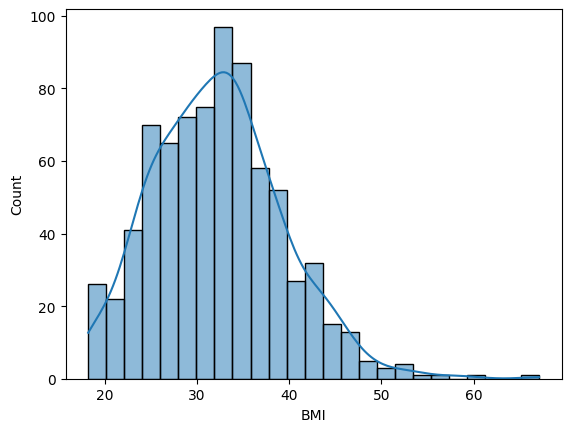

In [26]:
sns.histplot(data=df1, x='BMI', kde=True)

<Axes: xlabel='BloodPressure', ylabel='Count'>

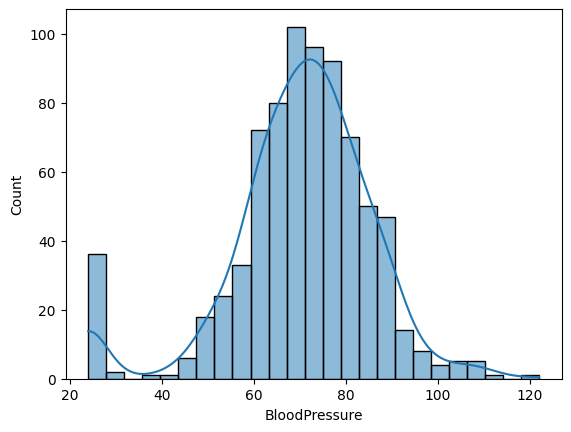

In [27]:
sns.histplot(data=df1, x='BloodPressure', kde=True)

<Axes: xlabel='Insulin', ylabel='Count'>

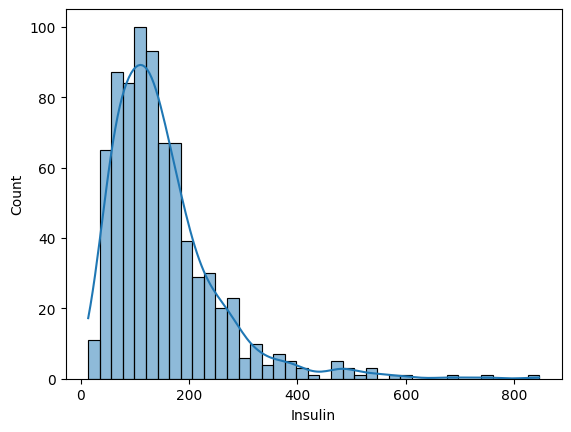

In [28]:
sns.histplot(data=df1,x='Insulin',kde=True)

<Axes: xlabel='DiabetesPedigreeFunction', ylabel='Count'>

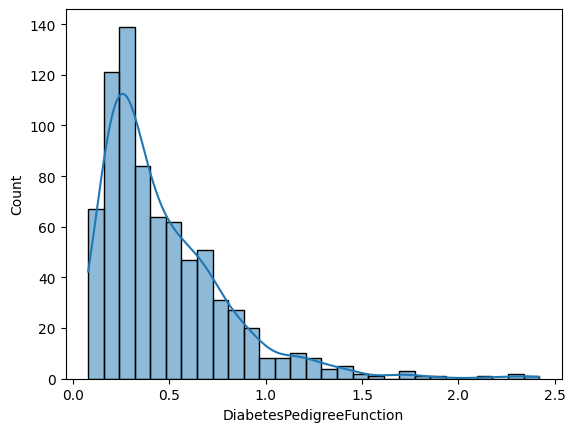

In [29]:
sns.histplot(data=df1,x='DiabetesPedigreeFunction',kde=True)

In [30]:
def full_diagnostic(df1,class_col,cols_to_exclude):
  import seaborn as sns
  import numpy as np
  cols=df1.select_dtypes(include=np.number).columns.tolist() #finding all the numerical columns from the dataframe
  X=df1[cols] #creating a dataframe only with the numerical columns
  X = X[X.columns.difference(cols_to_exclude)] #columns to exclude
  X = X[X.columns.difference([class_col])]
  sns.pairplot(df1,hue = class_col)

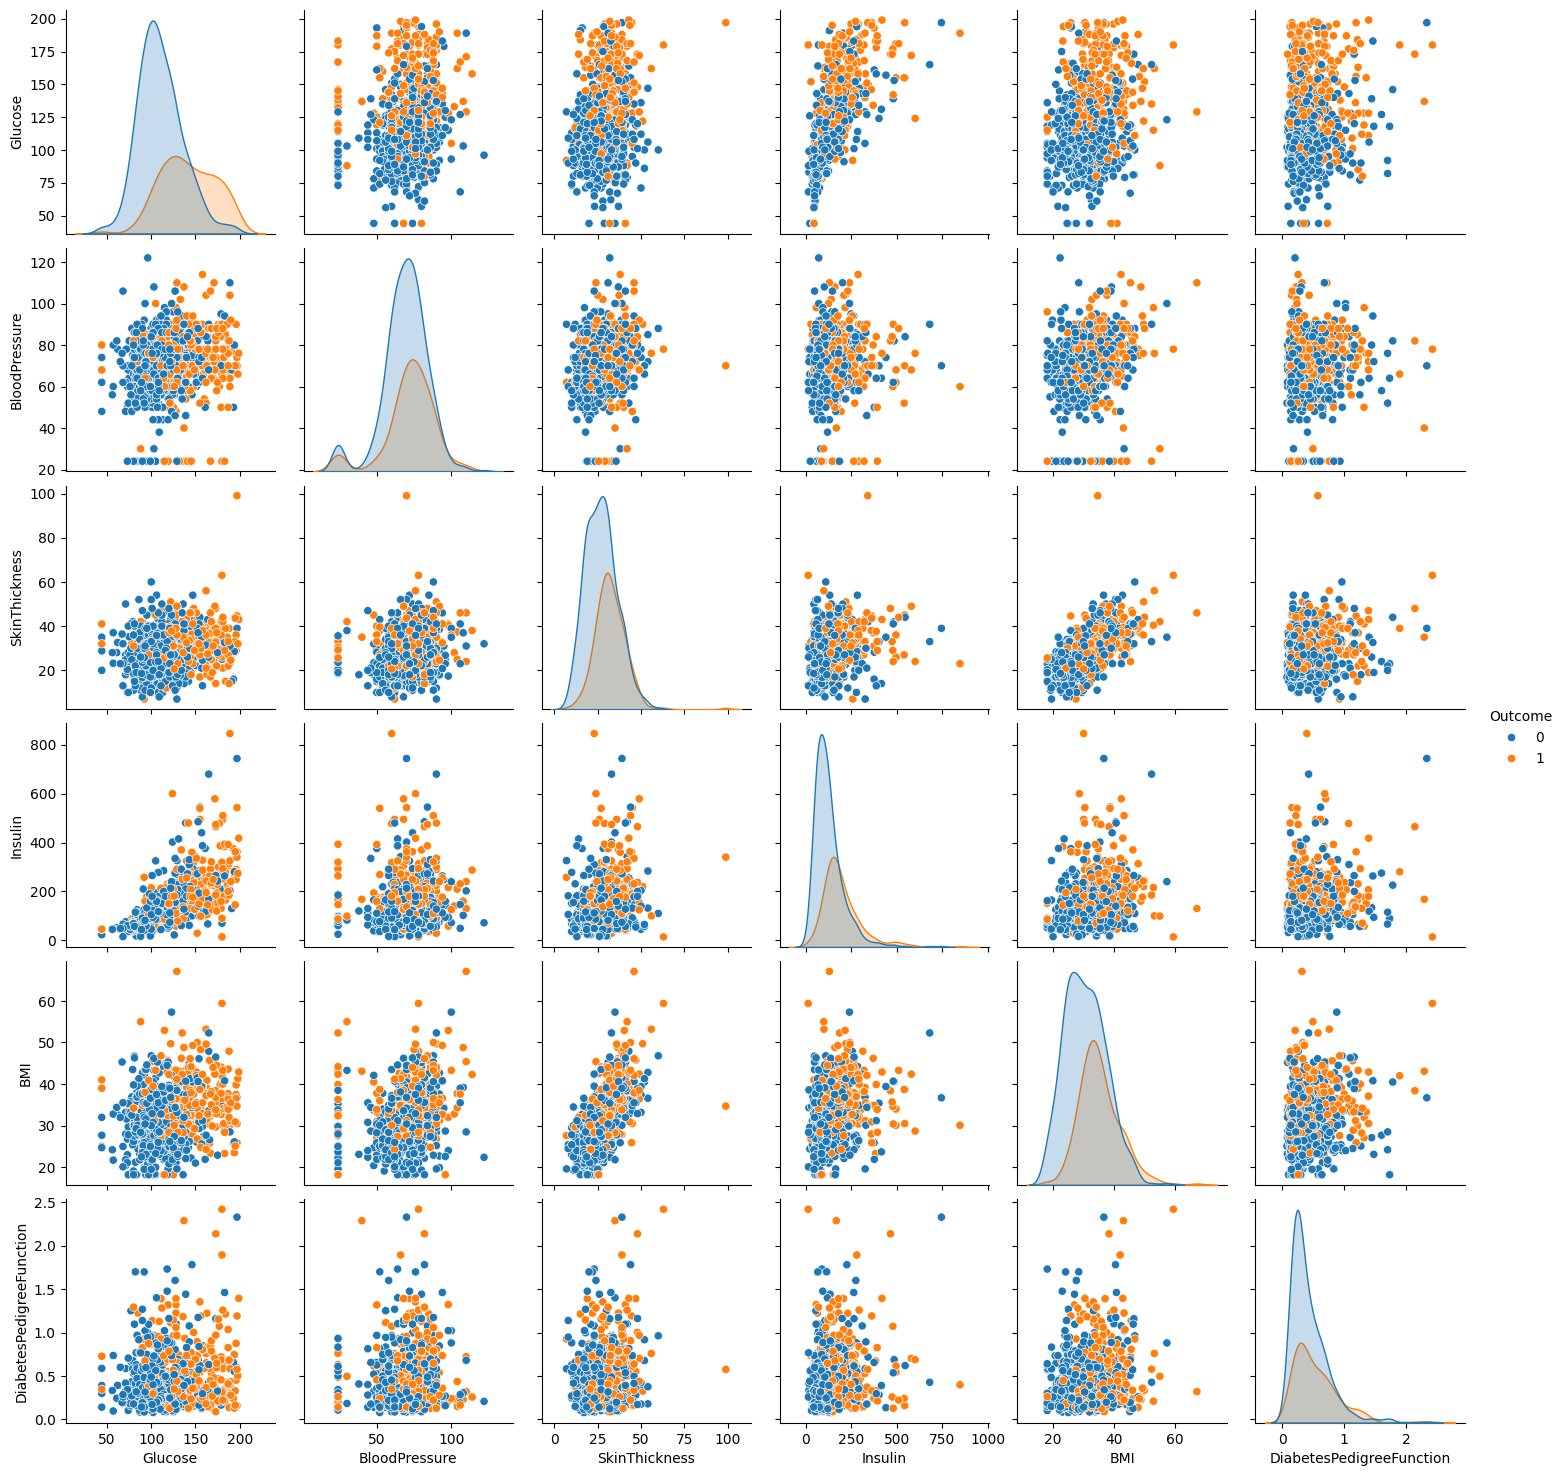

In [31]:
full_diagnostic(df1,class_col = 'Outcome',cols_to_exclude=['Age'])

In [32]:
(df1<0).any()

Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Outcome                     False
dtype: bool

In [33]:
from scipy.stats import skew

for i in ('SkinThickness','BMI','Glucose', 'BloodPressure','Insulin','DiabetesPedigreeFunction'):
  column_skewness = skew(df1[i])
  print(i,':',column_skewness)

SkinThickness : 0.7326662291099807
BMI : 0.5159530095896947
Glucose : 0.44663103253113956
BloodPressure : -0.83816930258491
Insulin : 2.1614983288700134
DiabetesPedigreeFunction : 1.9161592037386292


In [34]:
# df1['BloodPressure']=np.log(df1['BloodPressure'])
# skew(df1['BloodPressure'])
# df1['BloodPressure']=1/df1['BloodPressure']
# skew(df1['BloodPressure'])

In [35]:
df1['DiabetesPedigreeFunction']=np.log(df1['DiabetesPedigreeFunction'])
# df1['DiabetesPedigreeFunction']=np.log(df1['DiabetesPedigreeFunction'])

skew(df1['DiabetesPedigreeFunction'])

0.11395456387082803

<Axes: xlabel='DiabetesPedigreeFunction', ylabel='Count'>

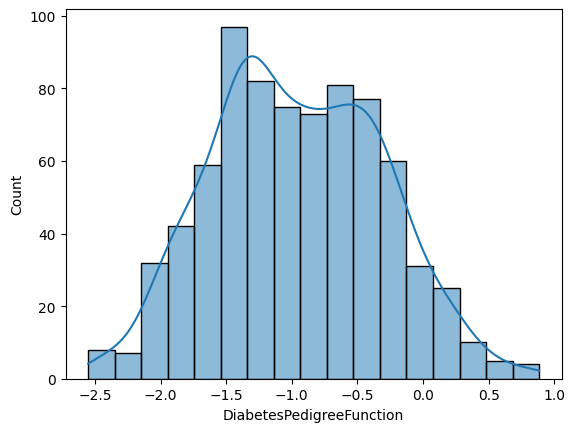

In [36]:
sns.histplot(data=df1, x='DiabetesPedigreeFunction', kde=True)

In [37]:
df1['Insulin']=np.log(df1['Insulin'])
skew(df1['Insulin'])

-0.18116976523788775

<Axes: xlabel='Insulin', ylabel='Count'>

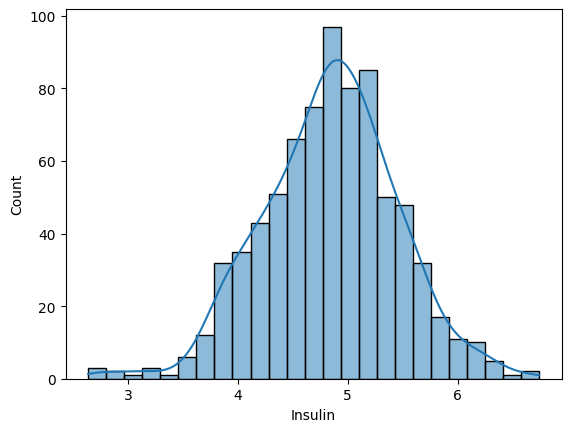

In [38]:
sns.histplot(data=df1,x='Insulin',kde=True)

In [39]:
df1['SkinThickness']=np.log(df1['SkinThickness'])
skew(df1['SkinThickness'])

-0.6486483759882808

<Axes: xlabel='SkinThickness', ylabel='Count'>

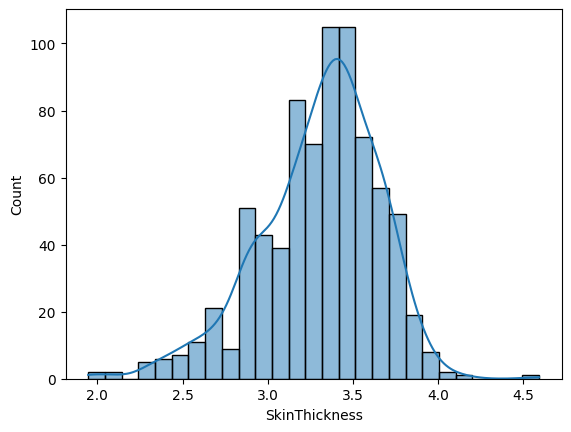

In [40]:
sns.histplot(data=df1, x='SkinThickness',kde=True)

In [41]:
df1.head(10)

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Outcome
0,148.0,72.0,3.555348,5.342334,33.6,-0.466809,1
1,85.0,66.0,3.367296,4.290459,26.6,-1.046969,0
2,183.0,64.0,3.380995,5.948557,23.3,-0.397497,1
3,89.0,66.0,3.135494,4.543295,28.1,-1.789761,0
4,137.0,40.0,3.555348,5.123964,43.1,0.827678,1
5,116.0,74.0,2.901422,4.558079,25.6,-1.604450,0
6,78.0,50.0,3.465736,4.477337,31.0,-1.394327,1
7,115.0,24.0,3.374169,4.584967,35.3,-2.009915,0
8,197.0,70.0,3.806662,6.297109,30.5,-1.845160,1
9,125.0,96.0,3.218876,5.021245,18.2,-1.461018,1


In [42]:
# Min-max scaling, robust scaling, and standard scaling (also known as z-score normalization) are all techniques used to scale numerical features in a dataset.
# Standard scaling transforms the data to have a mean of 0 and a standard deviation of 1.
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df1.drop('Outcome', axis=1))
ScaledX=pd.DataFrame(X_scaled)

In [43]:
ScaledX.head(10)

,0,1,2,3,4,5
0,0.863703,0.114339,0.716554,0.825795,0.190314,0.765848
1,-1.165204,-0.266626,0.178959,-0.901407,-0.798884,-0.135159
2,1.990874,-0.393615,0.218121,1.821227,-1.265221,0.873492
3,-1.036385,-0.266626,-0.483703,-0.486246,-0.586913,-1.288739
4,0.509449,-1.917479,0.716554,0.467226,1.532798,2.776227
5,-0.166853,0.241328,-1.152858,-0.461971,-0.940199,-1.000945
6,-1.390638,-1.282535,0.460375,-0.594550,-0.177103,-0.674616
7,-0.199058,-2.933388,0.198607,-0.417818,0.430548,-1.630645
8,2.441742,-0.012649,1.434999,2.393557,-0.247760,-1.374775
9,0.122991,1.638203,-0.245336,0.298560,-1.985923,-0.778190


In [44]:
# Robust scaling is similar to min-max scaling but uses the interquartile range (IQR) instead of the minimum and maximum values.
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
X_scaled = scaler.fit_transform(df1.drop('Outcome', axis=1))
RobustX=pd.DataFrame(X_scaled)

In [45]:
# This scaling technique rescales the data to a fixed range, usually between 0 and 1.
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler()
X_scaled=scaler.fit_transform(df1.drop('Outcome', axis=1))
MinMaxX=pd.DataFrame(X_scaled)

In [46]:
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(df1.drop('Outcome', axis=1),df1['Outcome'],test_size=0.2, random_state=101)
# X_train, X_test, y_train, y_test= train_test_split(MinMaxX,df1['Outcome'],test_size=0.2, random_state=101)


#RobustScaler and StandardScaler didn't affect the accuracy or the ROC_AUC of the model.

In [47]:
smote = SMOTE()
X_train_res, y_train_res = smote.fit_resample(X_train, y_train) #Oversampling of the dataset didn't improve the ROC_AUC or the precision of the model.

In [48]:
print('Original dataset shape:', Counter(y_train))
print('Oversampled dataset shape:', Counter(y_train_res))

Original dataset shape: Counter({0: 397, 1: 217})
Oversampled dataset shape: Counter({1: 397, 0: 397})


In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, accuracy_score

for solve in ('liblinear','newton-cholesky','sag', 'newton-cg', 'saga', 'lbfgs'):
  LRModel=LogisticRegression(solver=solve, max_iter=7600, random_state=101)  #class_weight='balanced' didn't improve the ROC_AUC of the model, despite decreased the accuracy of the model.
  LRModel.fit(X_train,y_train)                                                                           # multi_class='multinomial' didn't improve the Accuracy of the
  predictions_diabetes=LRModel.predict(X_test)
  print(solve)
  print(accuracy_score(y_test,predictions_diabetes))
  #Ridge Regression performs better than lasso regression; penalty='l2'

liblinear
0.8441558441558441
newton-cholesky
0.7987012987012987
sag
0.8181818181818182
newton-cg
0.7987012987012987
saga
0.8181818181818182
lbfgs
0.7987012987012987


In [50]:

LRModel=LogisticRegression(solver='liblinear', max_iter=7600, random_state=101)  #class_weight='balanced' didn't improve the ROC_AUC of the model, despite decreased the accuracy of the model.
LRModel.fit(X_train,y_train)                                                      # L1 and L2 regularization didn't improve the model accuracy.

LogisticRegression(max_iter=7600, random_state=101, solver='liblinear')

In [51]:
predictions_diabetes=LRModel.predict(X_test)

In [52]:

print(classification_report(y_test,predictions_diabetes))

#Precision: Out of all the positive predictions made by the model, how many were correct;
#Recall: Out of all the actual positive cases, how many did the model correctly identified;

              precision    recall  f1-score   support

           0       0.86      0.92      0.89       103
           1       0.81      0.69      0.74        51

    accuracy                           0.84       154
   macro avg       0.83      0.80      0.82       154
weighted avg       0.84      0.84      0.84       154



<Axes: >

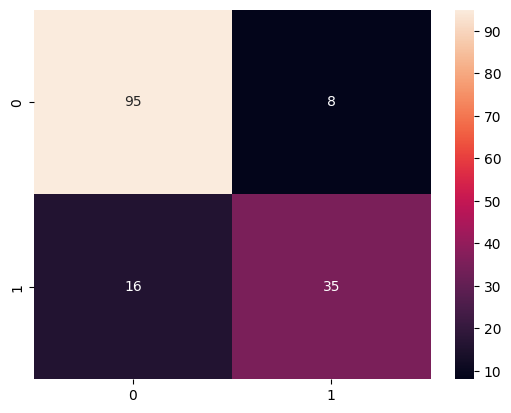

In [53]:
cm=confusion_matrix(y_test, predictions_diabetes)
sns.heatmap(cm, annot=True)

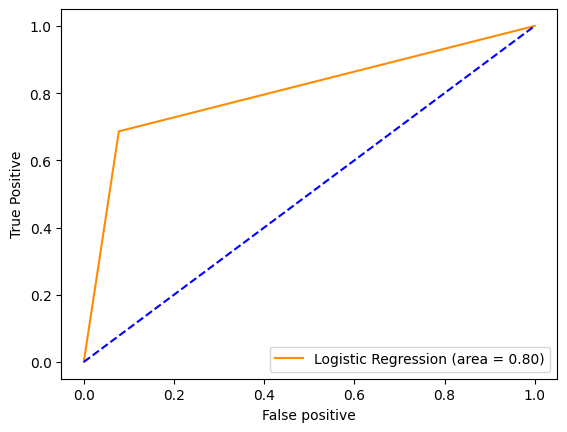

In [54]:
logit_roc_auc = roc_auc_score(y_test, LRModel.predict(X_test)) # ROC AUC score
fpr, tpr, thresholds = roc_curve(y_test, LRModel.predict(X_test)) # ROC curve

plt.plot(fpr, tpr,color='darkorange', label='Logistic Regression (area = %0.2f)' % logit_roc_auc)

#Plotting the worst line possiple
plt.plot([0, 1], [0, 1],'b--')
plt.xlabel('False positive')
plt.ylabel('True Positive')
plt.legend(loc='lower right')

In [55]:
df1['Outcome'].describe()

count    768.000000
mean       0.348958
std        0.476951
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: Outcome, dtype: float64

In [56]:
# X_train, X_test, y_train, y_test= train_test_split(RobustX,df1['Outcome'],test_size=0.2, random_state=101)  #RobustScaling, StandardScaling do not improve the accuracy and ROC_AUC
X_train, X_test, y_train, y_test= train_test_split(df1.drop('Outcome', axis=1),df1['Outcome'],test_size=0.2, random_state=101)

In [57]:
from sklearn import svm

# for k in ('linear','sigmoid','poly','rbf'):
#     model = svm.SVC(kernel=k, gamma='scale')
#     model.fit(X_train,y_train)
#     y_pred = model.predict(X_test)
#     print(k)
#     print(accuracy_score(y_test,y_pred))

In [58]:
# final_model = svm.SVC(C=0.1, kernel='linear', gamma=1, random_state=101)
# final_model.fit(X_train,y_train)
# y_pred = final_model.predict(X_test)
# print(classification_report(y_test,y_pred))

In [59]:
from sklearn.model_selection import GridSearchCV

# defining parameter range
param_grid = {'C': [0.1, 1, 10,100],
              'gamma': [1, 0.1, 0.01,'scale', 'auto'],
              'kernel': ['linear', 'rbf', 'sigmoid'],
              'random_state':[101]}

grid = GridSearchCV(svm.SVC(), param_grid, refit = True, verbose = 3,n_jobs=-1)

# fitting the model for grid search
grid.fit(X_train, y_train)

# print best parameter after tuning
print(grid.best_params_)
y_pred = grid.predict(X_test)      #KNNImputer and IterativeImputer(RandomForestRegressor) both results in same accuracy and the same ROC_AUC for the SVM model.

# print classification report
print(classification_report(y_test, y_pred))

# 'C': 0.1, 'gamma': 1, 'kernel': 'linear', 'random_state': 101

Fitting 5 folds for each of 60 candidates, totalling 300 fits
{'C': 0.1, 'gamma': 1, 'kernel': 'linear', 'random_state': 101}
              precision    recall  f1-score   support

           0       0.83      0.89      0.86       103
           1       0.74      0.63      0.68        51

    accuracy                           0.81       154
   macro avg       0.79      0.76      0.77       154
weighted avg       0.80      0.81      0.80       154



<Axes: >

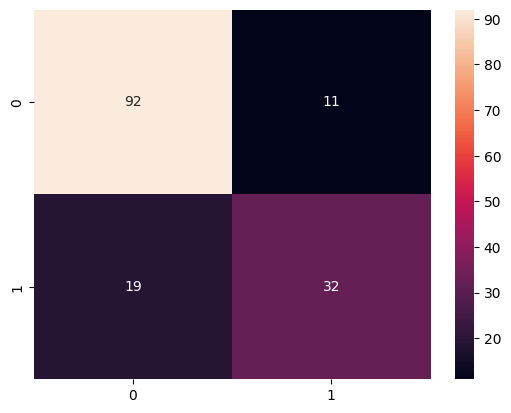

In [60]:
cm=confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)

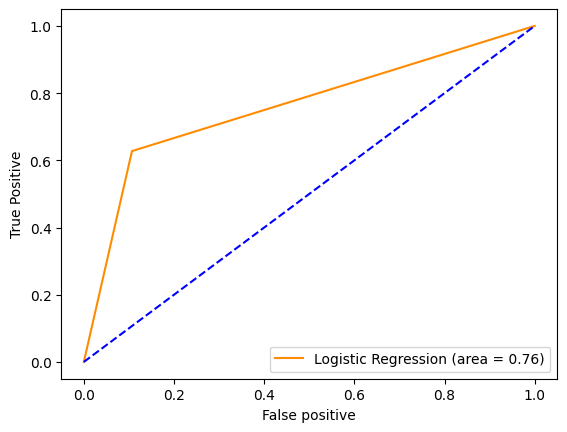

In [61]:
logit_roc_auc = roc_auc_score(y_test, y_pred) # ROC AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_pred) # ROC curve

plt.plot(fpr, tpr,color='darkorange', label='Logistic Regression (area = %0.2f)' % logit_roc_auc)

#Plotting the worst line possiple
plt.plot([0, 1], [0, 1],'b--')
plt.xlabel('False positive')
plt.ylabel('True Positive')
plt.legend(loc='lower right')

In [62]:
#Overall, Logistic regression model performs better than SVM

In [63]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_neighbors': [3,110,20],  # Number of neighbors
    'weights': ['uniform', 'distance'],  # Weight function
    'metric': ['euclidean', 'manhattan'],  # Distance metric
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],  # Algorithm for finding nearest neighbors
    'p': [1, 2],  # Parameter for Minkowski distance
    'leaf_size': [10, 20, 30],  # Leaf size for ball tree or KD tree
    # 'algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights'
}

# Initialize the KNN classifier
knn = KNeighborsClassifier()

# Perform grid search with cross-validation
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Print the best parameters found
print("Best Parameters:", grid_search.best_params_)

# Make predictions on the test set using the best model
y_pred = grid_search.predict(X_test)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Fitting 5 folds for each of 288 candidates, totalling 1440 fits
Best Parameters: {'algorithm': 'auto', 'leaf_size': 10, 'metric': 'euclidean', 'n_neighbors': 110, 'p': 1, 'weights': 'uniform'}
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.93      0.85       103
           1       0.77      0.45      0.57        51

    accuracy                           0.77       154
   macro avg       0.77      0.69      0.71       154
weighted avg       0.77      0.77      0.75       154



<Axes: >

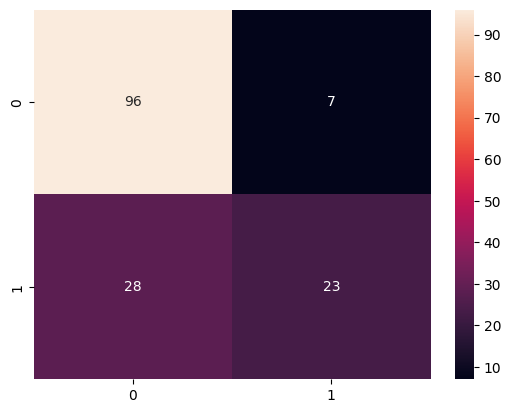

In [64]:
cm=confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)

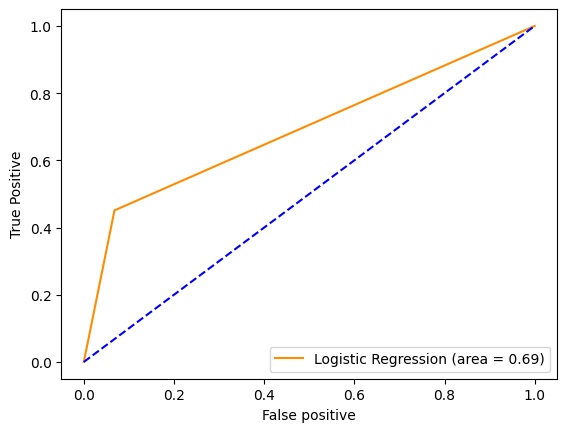

In [65]:
logit_roc_auc = roc_auc_score(y_test, y_pred) # ROC AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_pred) # ROC curve

plt.plot(fpr, tpr,color='darkorange', label='Logistic Regression (area = %0.2f)' % logit_roc_auc)

#Plotting the worst line possiple
plt.plot([0, 1], [0, 1],'b--')
plt.xlabel('False positive')
plt.ylabel('True Positive')
plt.legend(loc='lower right')

In [66]:
#Logitic Regression performs best and KNeighborsClassifier performs worst.